In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp,odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def solve_carreau(U0,Omega,N,Nt,dy,dt,H,v,eta_0,eta_inf,n):
    # Matrix each row will be valueof dui/dt at time t from 0 to T
    # u[i, j] is u(i*dy, j*dt)
    u = np.zeros((N, Nt)) # 0 to N-1, 0 to Nt-1
    #initial conditions
    u[:,0] = initial_0(Omega, v, 0)  # set everything to 0
    #boundary conditions
    for j in range(0, Nt):
        u[0, j] = boundary_condition_oci(U0, Omega, j*dt)
        u[N-1, j] = u[0, j]
    #all interior
    for j in range(0, Nt - 1):
        for i in range(1, N-1):
            d2udy2 = (u[i+1,j] + u[i-1,j]-2*u[i,j])/dy**2
            dudy =(u[i+1,j] - u[i,j])/dy
            v =(1 + dudy ** 2)**((n - 1)/2)
            dvdy = (n-1) * (1 + dudy ** 2) **((n-3)/2) * d2udy2 * dudy

            u[i,j+1] = (eta_0 - eta_inf) * dt * (dvdy * dudy + v * d2udy2) + u[i,j]
    
    y = np.linspace(0,H,N)
    return y,u

In [3]:
def initial_0(Omega, v, t):
    return 0

In [4]:
v = 1       
N = 100
H = 10
T = 2 * np.pi
Nt = 4001
U0 = 1
Omega = 1
dy = H / (N - 1)
dt = T / (Nt - 1)
eta_0 = 1
eta_inf = 0.5
n =  0.0001

def boundary_condition_oci(U0, Omega, t):
    return U0 * np.sin(Omega * t)

In [5]:
y, u = solve_carreau(U0,Omega,N,Nt,dy,dt,H,v,eta_0,eta_inf,n)

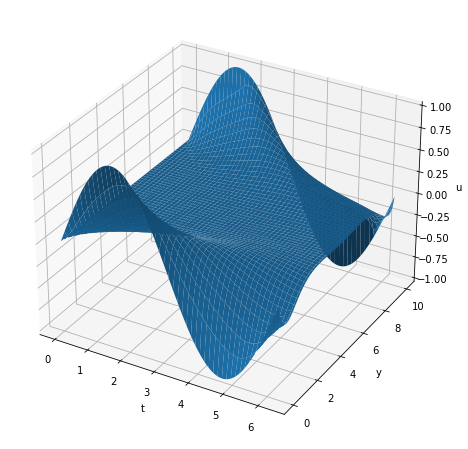

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
yy = np.linspace(0,H,N)
tt = np.linspace(0,T,Nt)
y_list, t_list = np.meshgrid(yy,tt)
ax.plot_surface(t_list.T, y_list.T, u)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()